In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

### Preprocessing data

In [6]:
n, img_rows, img_cols = X_train.shape
m, _, __ = X_test.shape

In [7]:
X_train = np.expand_dims(X_train, -1)
X_test = X_test[..., np.newaxis]

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train, X_test = X_train / 255.0, X_test / 255.0

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
input_shape = (img_rows, img_cols, 1)

In [15]:
num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

### Building the model

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, ReLU, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [17]:
class ConvNet(Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv_1 = Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape)
        self.conv_2 = Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
        self.maxpool = MaxPool2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.fc_1 = Dense(128, activation="relu")
        self.fc_2 = Dense(num_classes, activation="softmax")
        
    def call(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc_1(x)
        x = self.fc_2(x)
        
        return x

In [18]:
model = ConvNet()

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 183s 97ms/step - loss: 0.1092 - accuracy: 0.9668 - val_loss: 0.0441 - val_accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 3/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0415 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0363 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0469 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 230s 122ms/step - loss: 0.0066 - accuracy: 0.9978 - val_l

In [21]:
model.summary()

Model: "conv_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  1179776   
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                          

In [22]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.0509 - accuracy: 0.9900


### Plotting loss and accuracy

In [23]:
import matplotlib.pyplot as plt

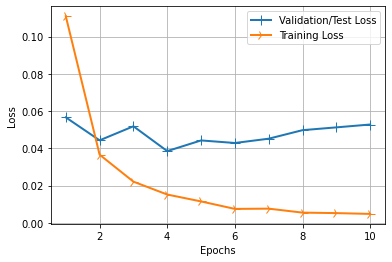

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Saving and loading model

In [31]:
model.save("mnist_10_ep.h5", save_format="tf")

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [28]:
from tensorflow.keras.models import load_model

In [29]:
classifier = load_model("mnist_10_ep.h5")

OSError: No file or directory found at mnist_10_ep.h5

In [25]:
pred = np.argmax(model.predict(X_test), -1)

313/313 [==============================] - 3s 9ms/step


1/1 [==============================] - 0s 30ms/step


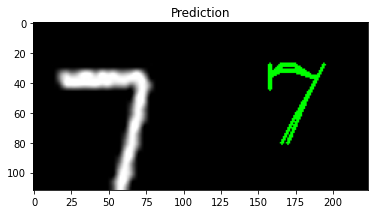

1/1 [==============================] - 0s 20ms/step


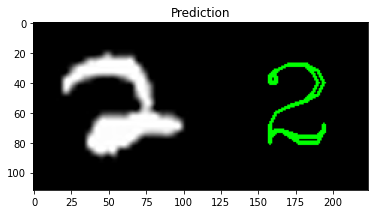

1/1 [==============================] - 0s 24ms/step


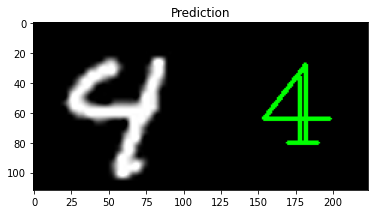

1/1 [==============================] - 0s 17ms/step


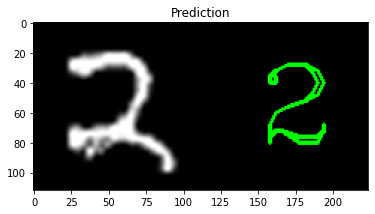

1/1 [==============================] - 0s 28ms/step


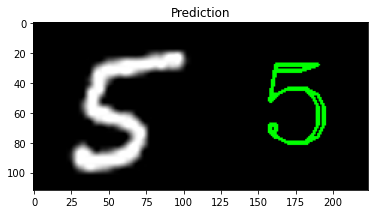

1/1 [==============================] - 0s 20ms/step


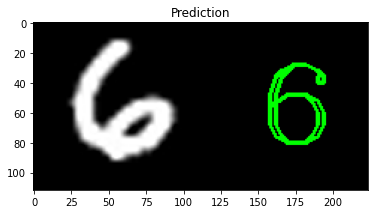

1/1 [==============================] - 0s 21ms/step


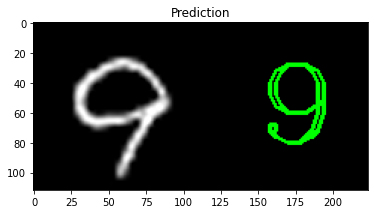

1/1 [==============================] - 0s 21ms/step


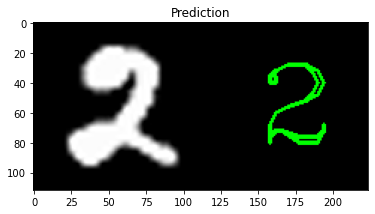

1/1 [==============================] - 0s 20ms/step


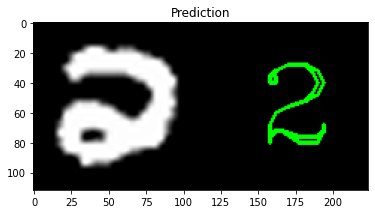

1/1 [==============================] - 0s 22ms/step


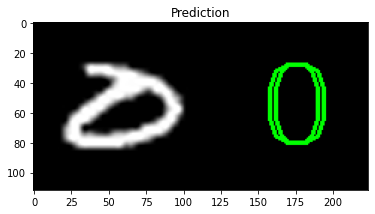

In [26]:
import cv2 as cv

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    BLACK = [0, 0, 0]
    expanded_image = cv.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv.cvtColor(expanded_image, cv.COLOR_GRAY2BGR)
    cv.putText(expanded_image, str(pred), (150, 80) , cv.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    plt.imshow(cv.cvtColor(expanded_image, cv.COLOR_BGR2RGB))
    plt.title(name)
    plt.show()
    

for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    imageL = cv.resize(input_im, None, fx=4, fy=4, interpolation = cv.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1).astype("float32") 
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])
    draw_test("Prediction", res,  np.uint8(imageL)) 

### Viewing missclassifications

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
y_pred = pred
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
result = np.absolute(y_test - pred)
miss_ind = np.nonzero(result > 0)


(array([  18,   62,  151,  160,  321,  340,  359,  445,  479,  497,  619,
         659,  813,  882,  883,  895,  900,  938,  956, 1014, 1039, 1061,
        1112, 1226, 1232, 1242, 1247, 1393, 1414, 1459, 1678, 1701, 1709,
        1737, 1790, 1828, 1878, 1901, 2043, 2070, 2118, 2129, 2130, 2195,
        2293, 2329, 2462, 2597, 2630, 2654, 2659, 2894, 2896, 2921, 2927,
        2939, 2953, 2995, 3030, 3060, 3172, 3218, 3422, 3520, 3534, 3558,
        3681, 3762, 3778, 3808, 3906, 4015, 4078, 4201, 4269, 4313, 4497,
        4536, 4571, 4575, 4740, 4761, 4783, 4814, 5140, 5201, 5331, 5642,
        5654, 5887, 5888, 5955, 6011, 6071, 6081, 6091, 6157, 6166, 6168,
        6172, 6173, 6532, 6571, 6574, 6597, 6625, 6651, 6783, 7849, 7928,
        8128, 8316, 9009, 9015, 9019, 9024, 9025, 9587, 9627, 9634, 9642,
        9664, 9692, 9729, 9733, 9793, 9811, 9982], dtype=int64),)

1/1 [==============================] - 0s 37ms/step


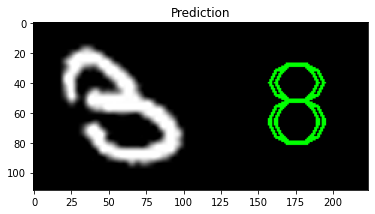

1/1 [==============================] - 0s 21ms/step


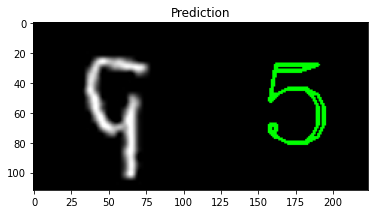

1/1 [==============================] - 0s 20ms/step


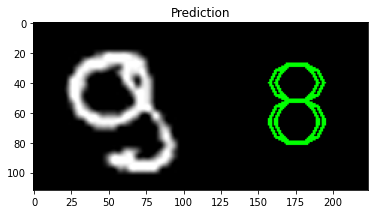

1/1 [==============================] - 0s 15ms/step


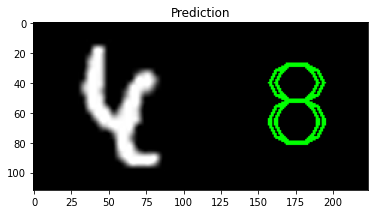

1/1 [==============================] - 0s 19ms/step


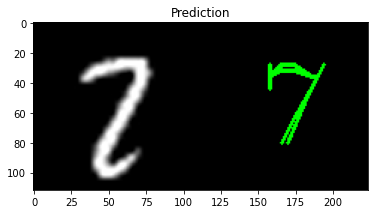

1/1 [==============================] - 0s 19ms/step


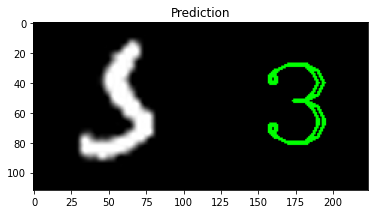

1/1 [==============================] - 0s 17ms/step


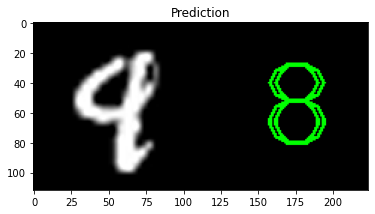

1/1 [==============================] - 0s 20ms/step


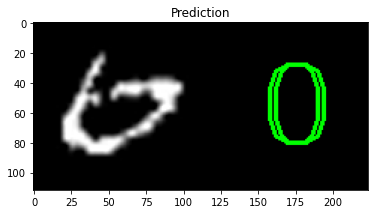

1/1 [==============================] - 0s 32ms/step


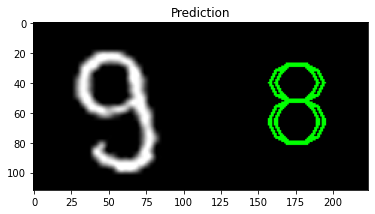

1/1 [==============================] - 0s 19ms/step


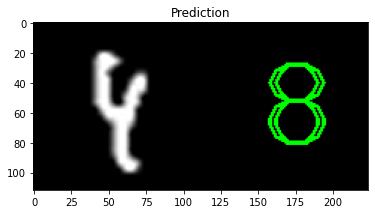

In [32]:
for i in range(0, 10):
    rand = np.random.randint(0, len(miss_ind))
    input_im = x_test[miss_ind[0][i]]
    imageL = cv.resize(input_im, None, fx=4, fy=4, interpolation = cv.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1).astype("float32") 
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])
    draw_test("Prediction", res,  np.uint8(imageL)) 

### Confusion matrix and classification report

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [36]:
cm = confusion_matrix(y_test, y_pred)

### Per-class accuracy

In [37]:
class_acc = 100 * cm.diagonal() / cm.sum(1)
class_acc

array([99.18367347, 99.030837  , 99.03100775, 98.81188119, 98.2688391 ,
       99.10313901, 98.434238  , 98.83268482, 99.58932238, 96.92765114])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      1.00      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
a